In [1]:
pip install ccxt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
exch = 'binance' # initial exchange
t_frame = '1d' # 1-day timeframe, usually from 1-minute to 1-week depending on the exchange
symbol = 'ADA/BTC' # initial symbol
#figure out coinbase, , 'bitstamp', 'bitflyer', 'gemini', 'itbit', 'bittrex'
exchange_list = ['binance','bitfinex','kraken','poloniex']
 
# Get our Exchange
try:
    exchange = getattr (ccxt, exch) ()
except AttributeError:
    print('-'*36,' ERROR ','-'*35)
    print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
    print('-'*80)
    quit()
 
# Check if fetching of OHLC Data is supported
if exchange.has["fetchOHLCV"] != True:
    print('-'*36,' ERROR ','-'*35)
    print('{} does not support fetching OHLC data. Please use another  exchange'.format(exch))
    print('-'*80)
    quit()
 
# Check requested timeframe is available. If not return a helpful error.
if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
    print('-'*36,' ERROR ','-'*35)
    print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
    print('Available timeframes are:')
    for key in exchange.timeframes.keys():
        print('  - ' + key)
    print('-'*80)
    quit()
 
# Check if the symbol is available on the Exchange
exchange.load_markets()
if symbol not in exchange.symbols:
    print('-'*36,' ERROR ','-'*35)
    print('The requested symbol ({}) is not available from {}\n'.format(symbol,exch))
    print('Available symbols are:')
    for key in exchange.symbols:
        print('  - ' + key)
    print('-'*80)
    quit()
 
 


In [3]:
# Get data
data = exchange.fetch_ohlcv(symbol, t_frame)
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame(data, columns=header).set_index('Timestamp')
df['symbol'] = symbol
syms = [symbol]
filename = '{}.csv'.format(t_frame)
exchange_map = defaultdict(list)
for exch in exchange_list:
    try:
        exchange = getattr (ccxt, exch) ()
    except AttributeError:
        print('-'*36,' ERROR ','-'*35)
        print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
        print('-'*80)
        quit()
    if exchange.has["fetchOHLCV"] != True:
        print('-'*36,' ERROR ','-'*35)
        print('{} does not support fetching OHLC data. Please use another exchange'.format(exch))
        print('-'*80)
        quit()
    if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
        print('-'*36,' ERROR ','-'*35)
        print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
        print('Available timeframes are:')
        for key in exchange.timeframes.keys():
            print('  - ' + key)
        print('-'*80)
        quit()
    exchange.load_markets()
    for coin in exchange.symbols:
        if coin in syms or coin[-3:] != 'BTC':
            continue
        else:
            try:
                data = exchange.fetch_ohlcv(coin, t_frame)
            except:
                continue
            data_df = pd.DataFrame(data, columns=header).set_index('Timestamp')
            data_df['symbol'] = coin
            df = df.append(data_df)
            syms.append(coin)
            exchange_map[exch] = [pd.to_datetime(data_df.index/1000, unit='s'), data_df.Close]
df.index = df.index/1000 #Timestamp is 1000 times bigger than it should be in this case
df['Date'] = pd.to_datetime(df.index,unit='s')

In [4]:
df

,Open,High,Low,Close,Volume,symbol,Date
Timestamp,,,,,,,
1.558310e+09,0.000011,0.000011,0.000010,0.000011,2.430554e+08,ADA/BTC,2019-05-20
1.558397e+09,0.000011,0.000011,0.000010,0.000011,1.602646e+08,ADA/BTC,2019-05-21
1.558483e+09,0.000011,0.000011,0.000010,0.000010,1.923128e+08,ADA/BTC,2019-05-22
1.558570e+09,0.000010,0.000010,0.000010,0.000010,1.543205e+08,ADA/BTC,2019-05-23
1.558656e+09,0.000010,0.000010,0.000010,0.000010,1.772117e+08,ADA/BTC,2019-05-24
...,...,...,...,...,...,...,...
1.601078e+09,0.003853,0.003853,0.003823,0.003839,5.370793e+01,XFIL/BTC,2020-09-26
1.601165e+09,0.003839,0.003857,0.003823,0.003840,3.641176e+01,XFIL/BTC,2020-09-27
1.601251e+09,0.003840,0.004015,0.003772,0.003799,9.183989e+01,XFIL/BTC,2020-09-28


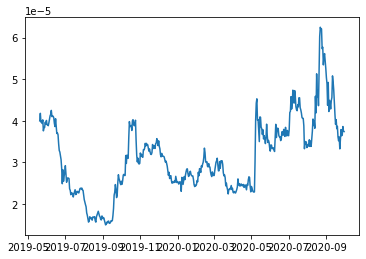

In [5]:
plt.plot(exchange_map["binance"][0], exchange_map["binance"][1])

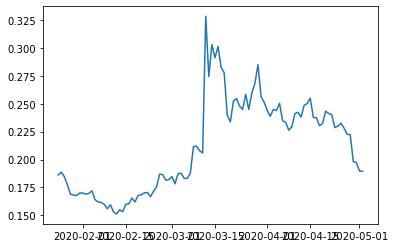

In [6]:
# exchange_map["binance"][1]
plt.plot(exchange_map["bitfinex"][0], exchange_map["bitfinex"][1])

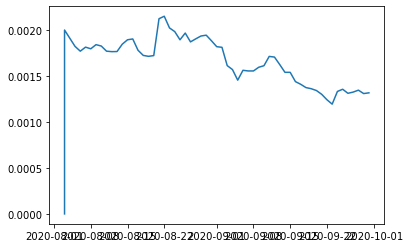

In [7]:
plt.plot(exchange_map["kraken"][0], exchange_map["kraken"][1])

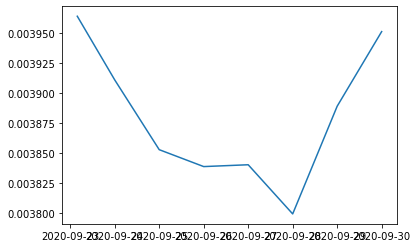

In [8]:
plt.plot(exchange_map["poloniex"][0], exchange_map["poloniex"][1])

In [9]:
exchange_map.keys()

dict_keys(['binance', 'bitfinex', 'kraken', 'poloniex'])

In [67]:
global_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
gc_df = pd.read_csv(global_cases_url, error_bad_lines=False)


In [68]:
gc_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715


In [69]:
row0 = gc_df.iloc[0, 4:]

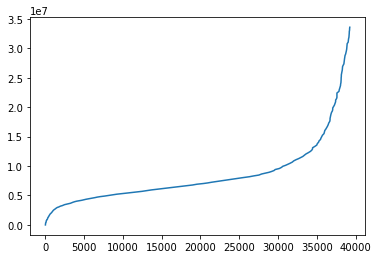

In [70]:
plt.plot(row0, gc_df.iloc[0:, 4:].sum(axis=0))

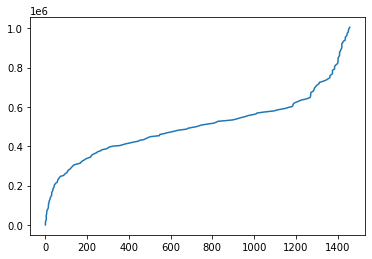

In [73]:
global_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
gd_df = pd.read_csv(global_deaths_url, error_bad_lines=False)
plt.plot(gd_df.iloc[0, 4:], gd_df.iloc[1:, 4:].sum(axis=0))


In [77]:
gd_df.iloc[0:, 4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20
0,0,0,0,0,0,0,0,0,0,0,...,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458
1,0,0,0,0,0,0,0,0,0,0,...,362,364,367,370,370,373,375,377,380,384
2,0,0,0,0,0,0,0,0,0,0,...,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726
3,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,0,0,0,0,0,0,0,0,0,0,...,152,154,155,159,162,167,171,174,176,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,262,265,269,272,274,278,285,291,299,306
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,586,586,586,586,586,587,587,587,587,587
264,0,0,0,0,0,0,0,0,0,0,...,330,331,331,332,332,332,332,332,332,332
